# Melhorando sua visualização de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

![](https://matplotlib.org/stable/_images/anatomy.png)

### Importando as bases e fazendo o primeiro gráfico

In [2]:
base = pd.read_excel("Visualização de dados no Python.xlsx")

In [3]:
base.head()

,Data,Pedidos,Entregas,EntregaNovoCD,TMAantigoCD,TMAnovoCD
0,2021-10-01,1230,1230,1230,1,1
1,2021-11-01,1235,1235,1235,1,1
2,2021-12-01,1280,1280,1280,1,1
3,2022-01-01,1310,1310,1310,1,1
4,2022-02-01,1572,1493,1493,2,2


In [4]:
base

,Data,Pedidos,Entregas,EntregaNovoCD,TMAantigoCD,TMAnovoCD
0,2021-10-01,1230,1230,1230,1,1
1,2021-11-01,1235,1235,1235,1,1
2,2021-12-01,1280,1280,1280,1,1
3,2022-01-01,1310,1310,1310,1,1
4,2022-02-01,1572,1493,1493,2,2
5,2022-03-01,2122,1910,1910,3,3
6,2022-04-01,3183,2546,2546,6,4
7,2022-05-01,4775,3581,4300,8,3
8,2022-06-01,5251,3938,5200,8,3
9,2022-07-01,5779,4136,6100,8,2


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           12 non-null     datetime64[ns]
 1   Pedidos        12 non-null     int64         
 2   Entregas       12 non-null     int64         
 3   EntregaNovoCD  12 non-null     int64         
 4   TMAantigoCD    12 non-null     int64         
 5   TMAnovoCD      12 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 704.0 bytes


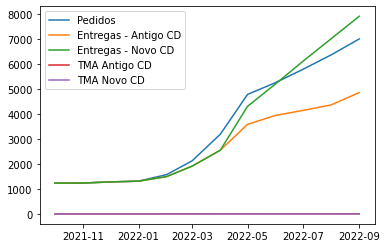

In [33]:
# plot
fig, ax = plt.subplots()

ax.plot(base.Data,base.Pedidos, label="Pedidos")
ax.plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax.plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax.plot(base.Data,base.TMAantigoCD, label="TMA Antigo CD")
ax.plot(base.Data,base.TMAnovoCD, label="TMA Novo CD")

plt.legend()

plt.show()

### Separando em 2 gráficos:
1. Pedidos x Entregas (antigo e novo CD)
2. TMA (antigo e novo CD)

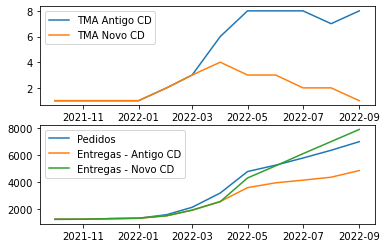

In [34]:
fig, ax = plt.subplots(nrows=2,ncols=1) # <- Quando passamos linhas e colunas, podemos determinar quantos plots vamos ter

## Pedidos x Entregas (antigo e novo CD) <- Primeiro plot
ax[1].plot(base.Data,base.Pedidos, label="Pedidos")
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

## TMA (antigo x novo CD) <- Segundo plot
ax[0].plot(base.Data,base.TMAantigoCD, label="TMA Antigo CD")
ax[0].plot(base.Data,base.TMAnovoCD, label="TMA Novo CD")
ax[0].legend()

plt.show()

### Melhorando a visualização
1. Podemos aumentar o tamanho dos gráficos
2. Vamos alterar a ordem dos gráficos (colocar o de TMA por cima)
3. Vamos aumentar proporcionalmente o gráfico de Pedidos x Entregas em relação ao de TMA

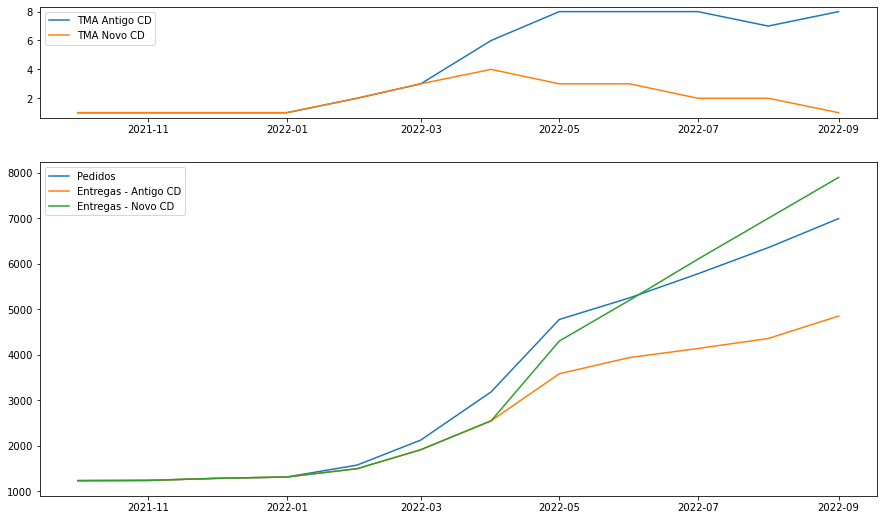

In [35]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # 1. Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # 3. Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # 2. Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

## TMA (antigo x novo CD)
ax[0].plot(base.Data,base.TMAantigoCD, label="TMA Antigo CD")
ax[0].plot(base.Data,base.TMAnovoCD, label="TMA Novo CD")
ax[0].legend()

plt.show()

### Alterando o tipo de gráfico
- Vamos trocar o gráfico do TMA para gráfico de barras para facilitar a visualização

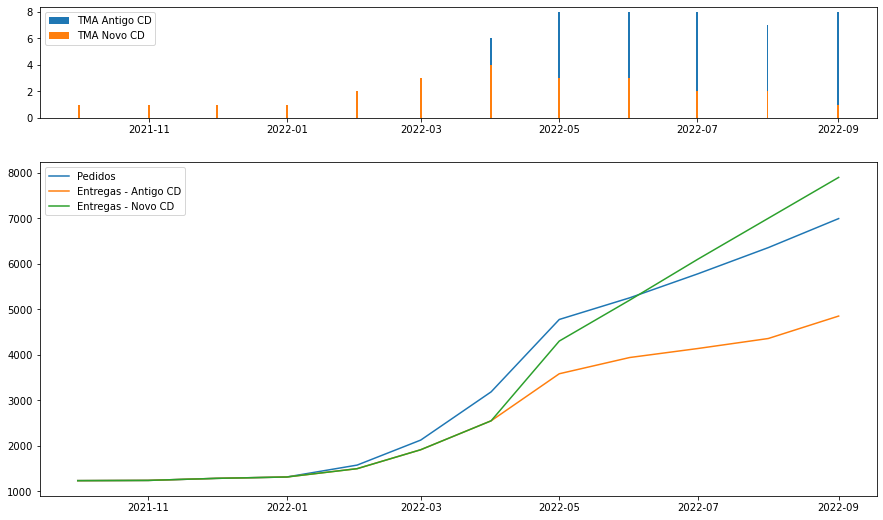

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # 1. Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # 3. Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

## TMA (antigo x novo CD)
ax[0].bar(base.Data,base.TMAantigoCD, label="TMA Antigo CD")
ax[0].bar(base.Data,base.TMAnovoCD, label="TMA Novo CD")
ax[0].legend()

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # 2. Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

### Ajustando as barras para ficarem uma do lado da outra

#### 1. Se tentarmos deslocar a barra usando datas, vamos aumentar a complexidade do nosso gráfico. Podemos apenas trocar o eixo x por um arange do numpy

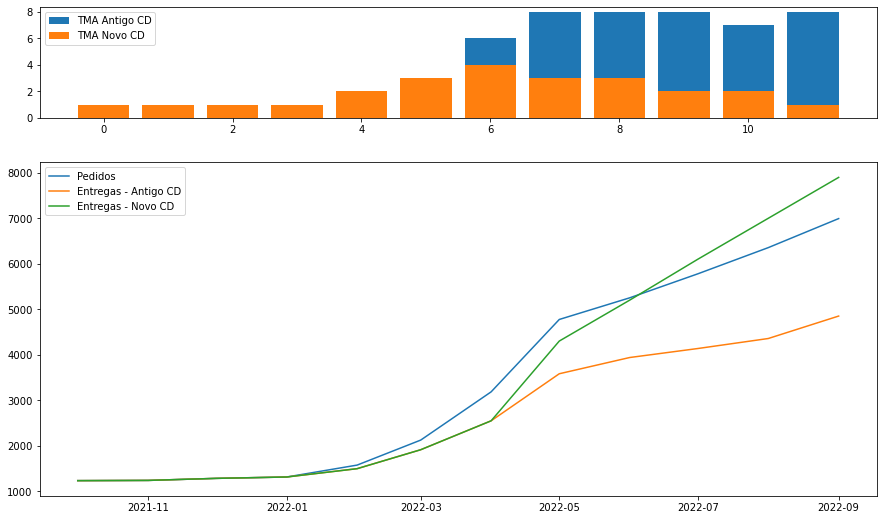

In [10]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # 1. Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # 3. Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base)),base.TMAantigoCD, label="TMA Antigo CD")
ax[0].bar(np.arange(len(base)),base.TMAnovoCD, label="TMA Novo CD")
ax[0].legend()

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # 2. Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

#### 2. Agora podemos definir o width da coluna e deslocar as colunas em relação a esse width

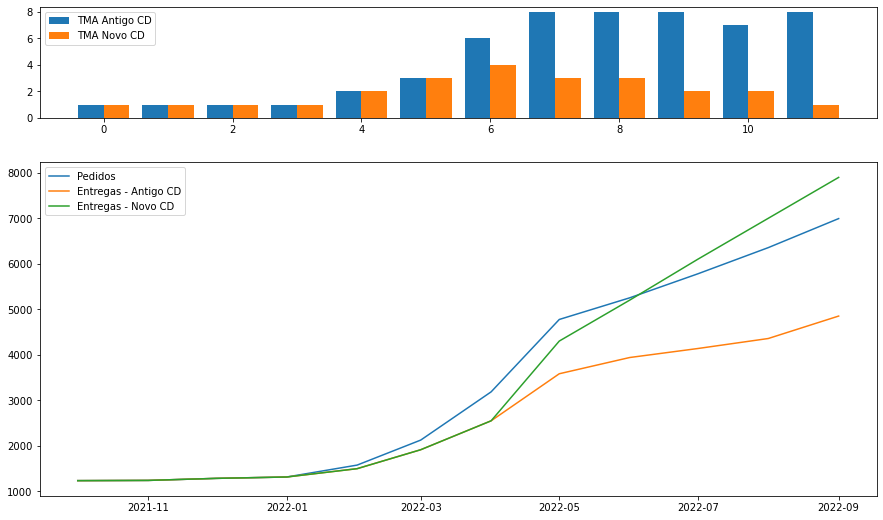

In [37]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # 1. Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # 3. Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # <- Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # <- Valores de Y
          width=wid, # <- Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # 2. Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

#### 3. E podemos retirar o xaxis do primeiro gráfico pois a informação é a mesma do segundo gráfico

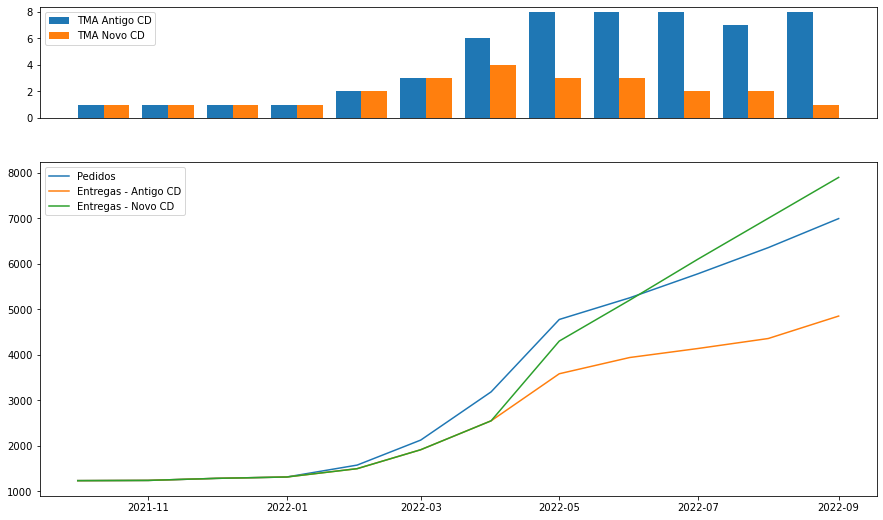

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # 1. Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # 3. Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()

ax[0].xaxis.set_visible(False) # <- Retirando o eixo X do primeiro gráfico

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # 2. Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

### Adicionando os rótulos de dados
- Para isso, vamos usar o annotate
    - Nele, a gente precisa colocar ponto por ponto qual valor queremos colocar
1. Primeiro vamos entender o annotate
2. Depois vamos colocar apenas no gráfico de barras em todos os valores
3. No gráfico de linhas, vamos selecionar quais pontos achamos que vale a pena mostrar os dados
4. Depois vamos retirar o eixo y

#### 1. Entendendo o annotate

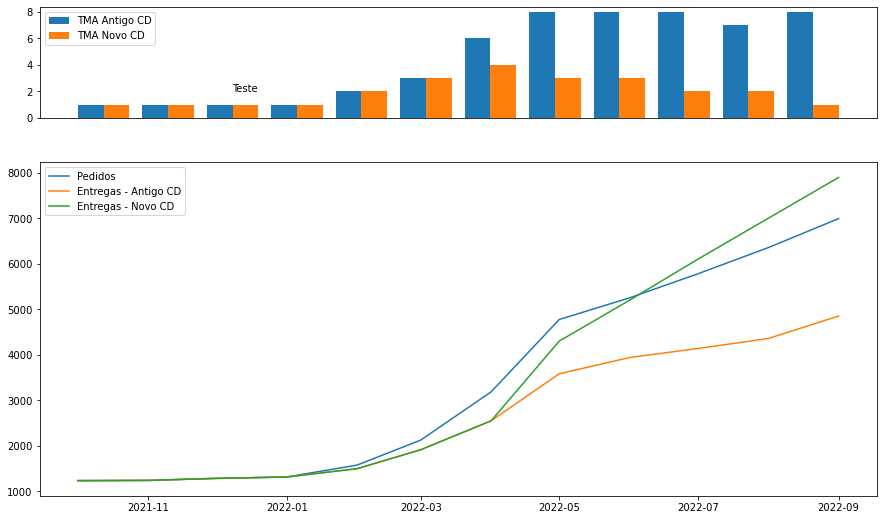

In [13]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
ax[0].annotate("Teste",(2,2))


## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

#### 2. Colocando todos os valores no gráfico de barras

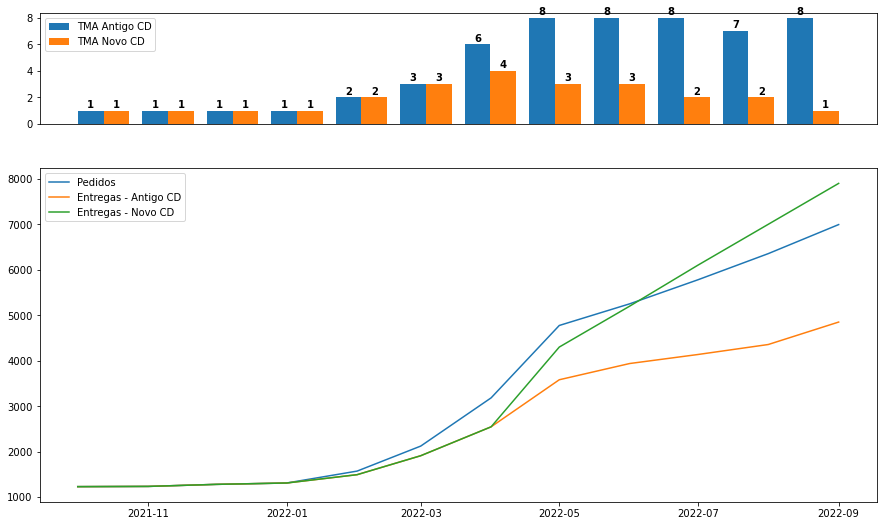

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )

    
## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

#### Aumentando o tamanho do eixo y para ajustar o gráfico e retirando os valores

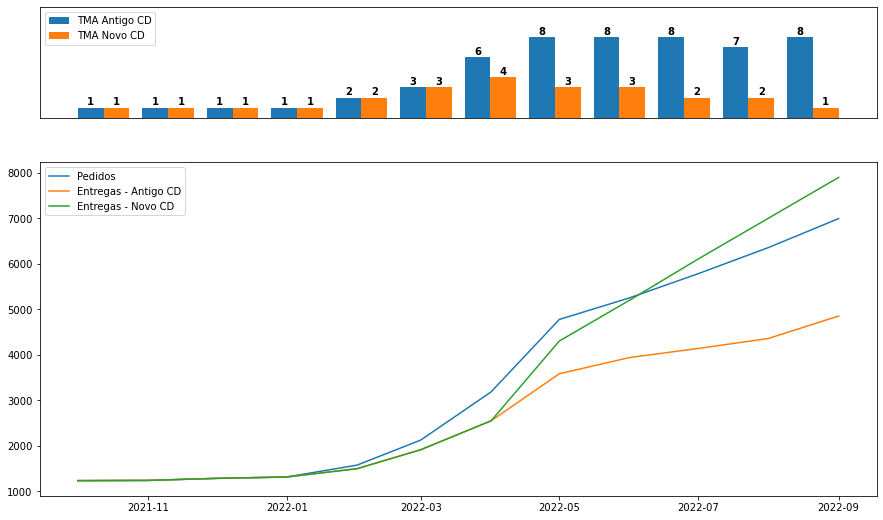

In [15]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)


## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(base.Data,base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

plt.show()

#### 3. Adicionando labels nos gráficos de linha

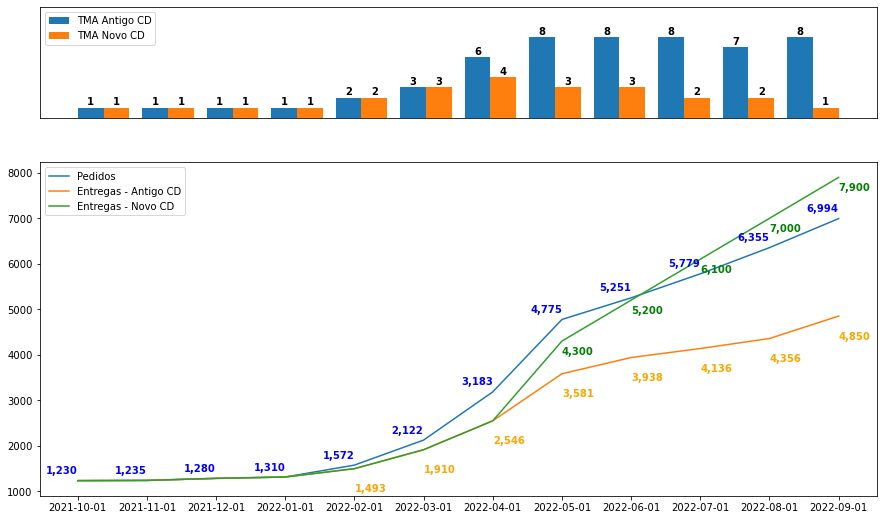

In [39]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)


## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(np.arange(len(base)),base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(np.arange(len(base)),base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(np.arange(len(base)),base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

# Usando o annotate
for i in np.arange(0,12):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="right", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(4,12):
    ax[1].annotate('{:,.0f}'.format(base.Entregas[i]), 
                 (i,base.Entregas[i]),  
                 ha="left", 
                 va="top",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="orange"
                )
for i in np.arange(7,12):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
ax[1].xaxis.set_ticks(np.arange(0,12))  
ax[1].set_xticklabels(np.datetime_as_string(base.Data.values,unit='D'))

plt.show()

#### 4. Retirando o eixo y

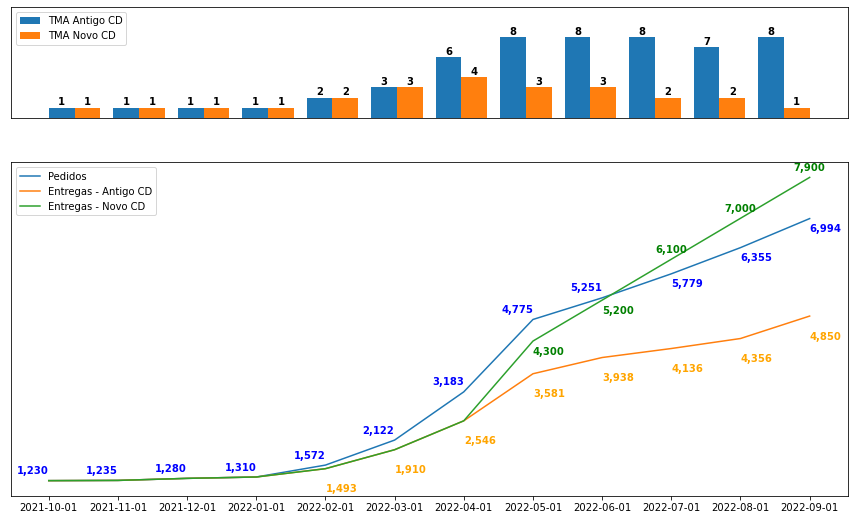

In [41]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)


## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(np.arange(len(base)),base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(np.arange(len(base)),base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(np.arange(len(base)),base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

# Usando o annotate
for i in np.arange(0,9):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="right", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(4,12):
    ax[1].annotate('{:,.0f}'.format(base.Entregas[i]), 
                 (i,base.Entregas[i]),  
                 ha="left", 
                 va="top",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="orange"
                )
for i in np.arange(7,9):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="center", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
ax[1].xaxis.set_ticks(np.arange(0,12))  
ax[1].set_xticklabels(np.datetime_as_string(base.Data.values,unit='D'))
ax[1].yaxis.set_visible(False)


plt.show()

### Retirando as bordas do gráfico

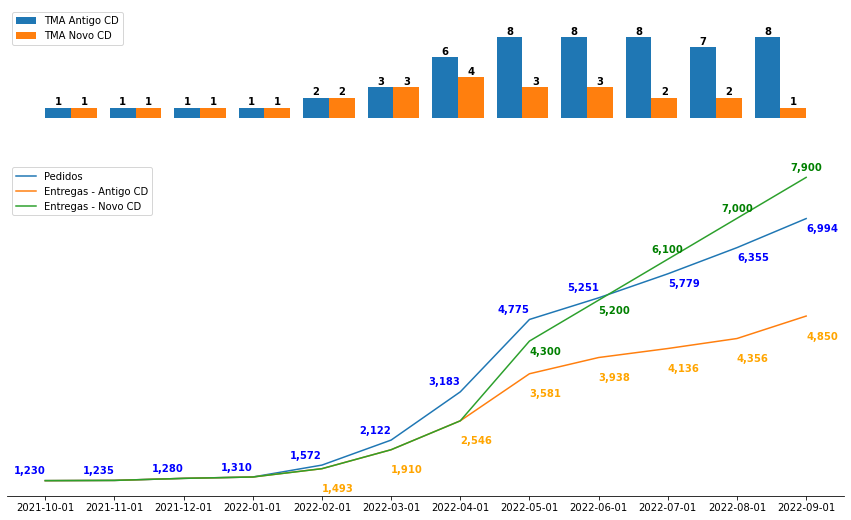

In [43]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].legend()
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(np.arange(len(base)),base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(np.arange(len(base)),base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(np.arange(len(base)),base.EntregaNovoCD, label="Entregas - Novo CD")
ax[1].legend()

# Usando o annotate
for i in np.arange(0,9):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="right", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(4,12):
    ax[1].annotate('{:,.0f}'.format(base.Entregas[i]), 
                 (i,base.Entregas[i]),  
                 ha="left", 
                 va="top",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="orange"
                )
for i in np.arange(7,9):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="center", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
ax[1].xaxis.set_ticks(np.arange(0,12))  
ax[1].set_xticklabels(np.datetime_as_string(base.Data.values,unit='D'))
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)

plt.show()

### Colocando as legendas nos eixos
- Vamos fazer isso usando o annotate

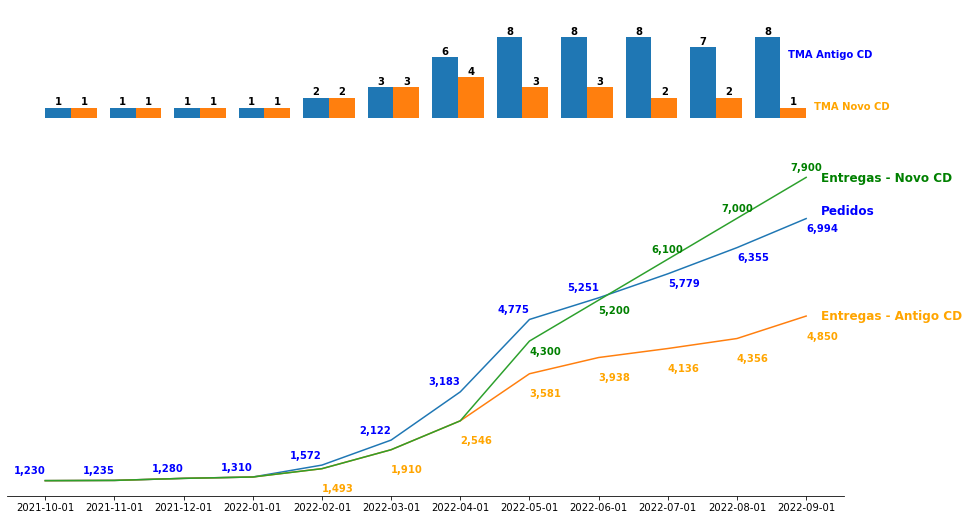

In [19]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD,  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD")
ax[0].bar(np.arange(len(base))+wid/2,
          base.TMAnovoCD, 
          width=wid,
          label="TMA Novo CD")
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

# Usando o annotate para colocar as legendas na frente dos dados
ax[0].annotate("TMA Antigo CD", 
            (i,base.TMAantigoCD[11]),  
            ha="left", 
            xytext=(8,-20),
            textcoords="offset points", 
            fontsize=10,
            fontweight='bold',
            color="blue"
        )
ax[0].annotate("TMA Novo CD", 
            (i+wid,base.TMAnovoCD[11]),  
            ha="left", 
            xytext=(8,-2),
            textcoords="offset points", 
            fontsize=10,
            fontweight='bold',
            color="orange"
        )

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(np.arange(len(base)),base.Pedidos, label="Pedidos") # Alterar a ordem dos gráficos
ax[1].plot(np.arange(len(base)),base.Entregas, label="Entregas - Antigo CD")
ax[1].plot(np.arange(len(base)),base.EntregaNovoCD, label="Entregas - Novo CD")

# Usando o annotate
for i in np.arange(0,9):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="right", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(4,12):
    ax[1].annotate('{:,.0f}'.format(base.Entregas[i]), 
                 (i,base.Entregas[i]),  
                 ha="left", 
                 va="top",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="orange"
                )
for i in np.arange(7,9):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="center", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
ax[1].xaxis.set_ticks(np.arange(0,12))  
ax[1].set_xticklabels(np.datetime_as_string(base.Data.values,unit='D'))
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)

# Colocando a legenda na frente das retas
ax[1].annotate("Entregas - Novo CD", 
            (i,base.EntregaNovoCD[11]),
            ha="left", 
            va="center",
            xytext=(+15,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
        )
ax[1].annotate("Entregas - Antigo CD", 
            (i,base.Entregas[11]),
            ha="left", 
            va="center",
            xytext=(+15,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="orange"
        )
ax[1].annotate("Pedidos", 
            (i,base.Pedidos[11]),
            ha="left", 
            va="center",
            xytext=(+15,+8), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="blue"
        )

plt.show()

### Separando entre realizado x projetado

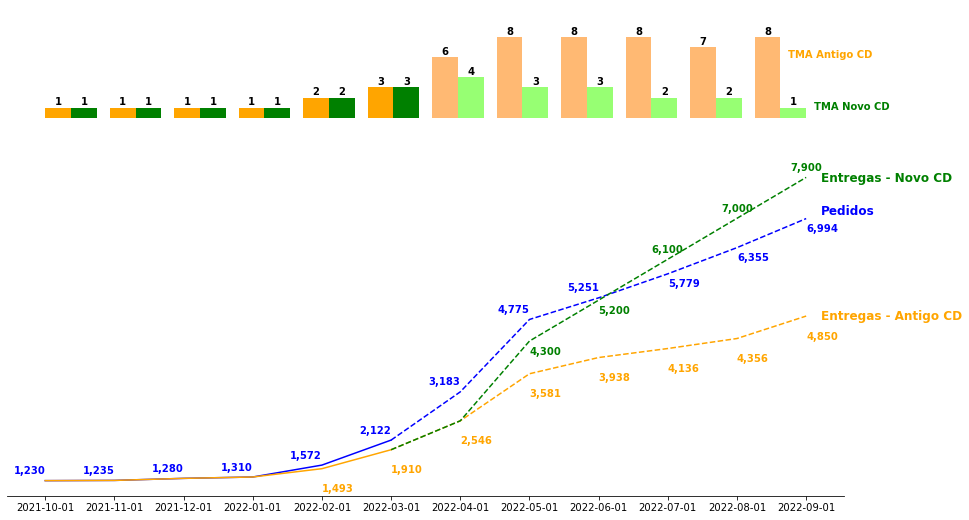

In [51]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))[:7]-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD[:7],  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD",
          color="orange")
ax[0].bar(np.arange(len(base))[-6:]-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD[-6:],  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD",
          color="#FFB973")
ax[0].bar(np.arange(len(base))[:7]+wid/2,
          base.TMAnovoCD[:7], 
          width=wid,
          label="TMA Novo CD",
          color="green")
ax[0].bar(np.arange(len(base))[-6:]+wid/2,
          base.TMAnovoCD[-6:], 
          width=wid,
          label="TMA Novo CD",
          color="#97FF73")
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

# Usando o annotate para colocar as legendas na frente dos dados
ax[0].annotate("TMA Antigo CD", 
            (i,base.TMAantigoCD[11]),  
            ha="left", 
            xytext=(8,-20),
            textcoords="offset points", 
            fontsize=10,
            fontweight='bold',
            color="orange"
        )
ax[0].annotate("TMA Novo CD", 
            (i+wid,base.TMAnovoCD[11]),  
            ha="left", 
            xytext=(8,-2),
            textcoords="offset points", 
            fontsize=10,
            fontweight='bold',
            color="green"
        )

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(np.arange(len(base))[:6],base.Pedidos[:6],color="blue") # Alterar a ordem dos gráficos
ax[1].plot(np.arange(len(base))[-7:],base.Pedidos[-7:], "--",color="blue")
ax[1].plot(np.arange(len(base))[:6],base.Entregas[:6],color="orange")
ax[1].plot(np.arange(len(base))[-7:],base.Entregas[-7:], "--",color="orange")
#ax[1].plot(np.arange(len(base))[:6],base.EntregaNovoCD[:6],color="green")
ax[1].plot(np.arange(len(base))[-7:],base.EntregaNovoCD[-7:], "--",color="green")

# Usando o annotate
for i in np.arange(0,9):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="right", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(4,12):
    ax[1].annotate('{:,.0f}'.format(base.Entregas[i]), 
                 (i,base.Entregas[i]),  
                 ha="left", 
                 va="top",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="orange"
                )
for i in np.arange(7,9):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="center", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
ax[1].xaxis.set_ticks(np.arange(0,12))  
ax[1].set_xticklabels(np.datetime_as_string(base.Data.values,unit='D'))
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)

# Colocando a legenda na frente das retas
ax[1].annotate("Entregas - Novo CD", 
            (i,base.EntregaNovoCD[11]),
            ha="left", 
            va="center",
            xytext=(+15,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
        )
ax[1].annotate("Entregas - Antigo CD", 
            (i,base.Entregas[11]),
            ha="left", 
            va="center",
            xytext=(+15,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="orange"
        )
ax[1].annotate("Pedidos", 
            (i,base.Pedidos[11]),
            ha="left", 
            va="center",
            xytext=(+15,+8), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="blue"
        )

plt.show()

### Destacando a área do projetado

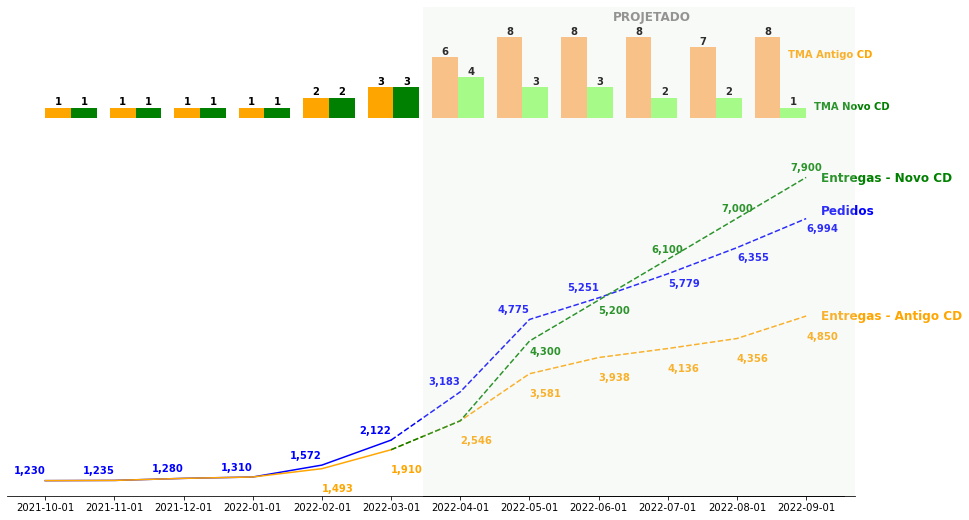

In [45]:
fig, ax = plt.subplots(nrows=2,ncols=1, 
                       figsize=(15,9), # Aumentar o tamanho dos gráficos
                       gridspec_kw={'height_ratios': [1,3]} # Aumentar a proporção do gráfico de Pedidos x Entregas
                      )

# Definindo uma largura padrão para as colunas
wid = 0.4

## TMA (antigo x novo CD)
ax[0].bar(np.arange(len(base))[:7]-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD[:7],  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD",
          color="orange")
ax[0].bar(np.arange(len(base))[-6:]-wid/2, # Valores de X deslocados pela largura para a esquerda
          base.TMAantigoCD[-6:],  # Valores de Y
          width=wid, # Nova largura da base
          label="TMA Antigo CD",
          color="#FFB973")
ax[0].bar(np.arange(len(base))[:7]+wid/2,
          base.TMAnovoCD[:7], 
          width=wid,
          label="TMA Novo CD",
          color="green")
ax[0].bar(np.arange(len(base))[-6:]+wid/2,
          base.TMAnovoCD[-6:], 
          width=wid,
          label="TMA Novo CD",
          color="#97FF73")
ax[0].xaxis.set_visible(False) # Retirando o eixo X do primeiro gráfico

# Usando o annotate
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAantigoCD[i]), # formatando o número
                 (i-wid/2,base.TMAantigoCD[i]), # colocando a posição do elemento 
                 ha="center", # alinhamento horizontal
                 xytext=(0,3), # deslocamento x,y do texto
                 textcoords="offset points", # referencial que vamos fazer o deslocamento
                 fontsize=10, # tamanho da fonte
                 fontweight='bold' # colocando em negrito
                )
for i in np.arange(0,12):
    ax[0].annotate('{:,.0f}'.format(base.TMAnovoCD[i]), 
                 (i+wid/2,base.TMAnovoCD[i]), 
                 ha="center", 
                 xytext=(0,3), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold'
                )
ax[0].set_yticks(np.arange(0,12))
ax[0].yaxis.set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

# Usando o annotate para colocar as legendas na frente dos dados
ax[0].annotate("TMA Antigo CD", 
            (i,base.TMAantigoCD[11]),  
            ha="left", 
            xytext=(8,-20),
            textcoords="offset points", 
            fontsize=10,
            fontweight='bold',
            color="orange"
        )
ax[0].annotate("TMA Novo CD", 
            (i+wid,base.TMAnovoCD[11]),  
            ha="left", 
            xytext=(8,-2),
            textcoords="offset points", 
            fontsize=10,
            fontweight='bold',
            color="green"
        )

## Pedidos x Entregas (antigo e novo CD)
ax[1].plot(np.arange(len(base))[:6],base.Pedidos[:6],color="blue") # Alterar a ordem dos gráficos
ax[1].plot(np.arange(len(base))[-7:],base.Pedidos[-7:], "--",color="blue")
ax[1].plot(np.arange(len(base))[:6],base.Entregas[:6],color="orange")
ax[1].plot(np.arange(len(base))[-7:],base.Entregas[-7:], "--",color="orange")
#ax[1].plot(np.arange(len(base))[:6],base.EntregaNovoCD[:6],color="green")
ax[1].plot(np.arange(len(base))[-7:],base.EntregaNovoCD[-7:], "--",color="green")

# Usando o annotate
for i in np.arange(0,9):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="right", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.Pedidos[i]), 
                 (i,base.Pedidos[i]), 
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="blue"
                )
for i in np.arange(4,12):
    ax[1].annotate('{:,.0f}'.format(base.Entregas[i]), 
                 (i,base.Entregas[i]),  
                 ha="left", 
                 va="top",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="orange"
                )
for i in np.arange(7,9):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="left", 
                 va="bottom",
                 xytext=(0,-15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
for i in np.arange(9,12):
    ax[1].annotate('{:,.0f}'.format(base.EntregaNovoCD[i]), 
                 (i,base.EntregaNovoCD[i]),
                 ha="center", 
                 va="top",
                 xytext=(0,+15), 
                 textcoords="offset points", 
                 fontsize=10, 
                 fontweight='bold',
                 color="green"
                )
ax[1].xaxis.set_ticks(np.arange(0,12))  
ax[1].set_xticklabels(np.datetime_as_string(base.Data.values,unit='D'))
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)

# Colocando a legenda na frente das retas
ax[1].annotate("Entregas - Novo CD", 
            (i,base.EntregaNovoCD[11]),
            ha="left", 
            va="center",
            xytext=(+15,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
        )
ax[1].annotate("Entregas - Antigo CD", 
            (i,base.Entregas[11]),
            ha="left", 
            va="center",
            xytext=(+15,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="orange"
        )
ax[1].annotate("Pedidos", 
            (i,base.Pedidos[11]),
            ha="left", 
            va="center",
            xytext=(+15,+8), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="blue"
        )

ax1 = fig.add_axes([0.51,0.125,0.4,0.755])
rect = ax1.patch
rect.set_edgecolor(None)
rect.set_facecolor('#E0E6DE')
rect.set_alpha(0.2)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax[0].annotate("PROJETADO", 
            (9,10),
            ha="center", 
            va="center",
            xytext=(0,0), 
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="gray"
        )

plt.show()

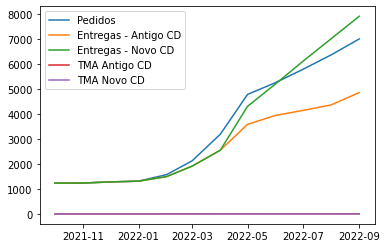

In [22]:
# plot antes de fazer toda a formatação acima
fig, ax = plt.subplots()

ax.plot(base.Data,base.Pedidos, label="Pedidos")
ax.plot(base.Data,base.Entregas, label="Entregas - Antigo CD")
ax.plot(base.Data,base.EntregaNovoCD, label="Entregas - Novo CD")
ax.plot(base.Data,base.TMAantigoCD, label="TMA Antigo CD")
ax.plot(base.Data,base.TMAnovoCD, label="TMA Novo CD")

plt.legend()

plt.show()